In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df=pd.read_csv("C:\\Users\\gowri\\Downloads\\Paper2\\credit_card.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



# The primary analysis of several categorical features :

No catagorical features found in the dataset except CUST_ID. Eventhough it is categorial it act as 
a unqiue key for the dataset. So CUST_ID is not considered for analysis 

# Perform the following Exploratory Data Analysis tasks:
a. Missing Value Analysis
b. Outlier Treatment using the Z-score method
c. Deal with correlated variables

In [4]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.shape

(8950, 18)

In [6]:
df.duplicated().sum()

0

In [7]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [8]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)

In [9]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

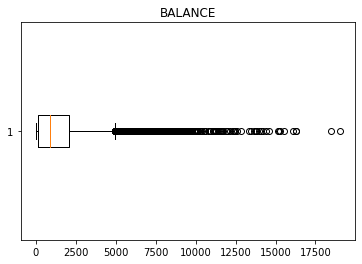

0       0.731989
1       0.786961
2       0.447135
3       0.049099
4       0.358775
          ...   
8945    0.737950
8946    0.742423
8947    0.740398
8948    0.745174
8949    0.572575
Name: BALANCE, Length: 8950, dtype: float64


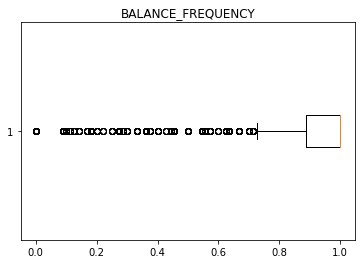

0       0.249434
1       0.134325
2       0.518084
3       1.016953
4       0.518084
          ...   
8945    0.518084
8946    0.518084
8947    0.185477
8948    0.185477
8949    0.889033
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64


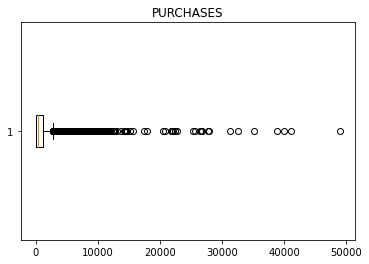

0       0.424900
1       0.469552
2       0.107668
3       0.232058
4       0.462063
          ...   
8945    0.333293
8946    0.329136
8947    0.401965
8948    0.469552
8949    0.042146
Name: PURCHASES, Length: 8950, dtype: float64


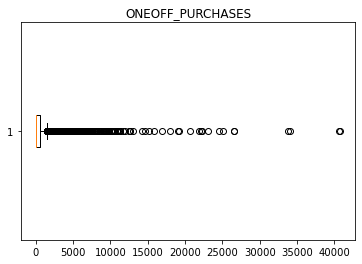

0       0.356934
1       0.356934
2       0.108889
3       0.546189
4       0.347294
          ...   
8945    0.356934
8946    0.356934
8947    0.356934
8948    0.356934
8949    0.301732
Name: ONEOFF_PURCHASES, Length: 8950, dtype: float64


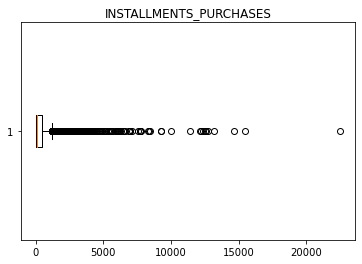

0       0.349079
1       0.454576
2       0.454576
3       0.454576
4       0.454576
          ...   
8945    0.132643
8946    0.122823
8947    0.294893
8948    0.454576
8949    0.454576
Name: INSTALLMENTS_PURCHASES, Length: 8950, dtype: float64


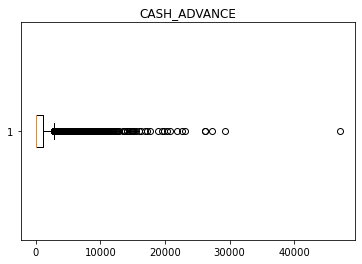

0       0.466786
1       2.605605
2       0.466786
3       0.368653
4       0.466786
          ...   
8945    0.466786
8946    0.466786
8947    0.466786
8948    0.449352
8949    0.406205
Name: CASH_ADVANCE, Length: 8950, dtype: float64


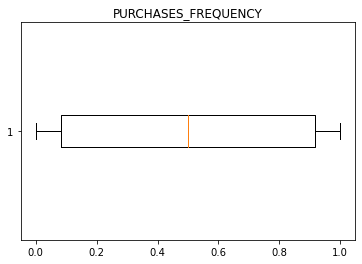

0       0.806490
1       1.221758
2       1.269843
3       1.014125
4       1.014125
          ...   
8945    1.269843
8946    1.269843
8947    0.854576
8948    1.221758
8949    0.439310
Name: PURCHASES_FREQUENCY, Length: 8950, dtype: float64


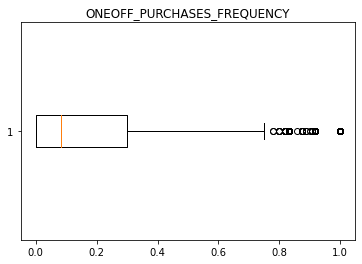

0       0.678661
1       0.678661
2       2.673451
3       0.399319
4       0.399319
          ...   
8945    0.678661
8946    0.678661
8947    0.678661
8948    0.678661
8949    1.556082
Name: ONEOFF_PURCHASES_FREQUENCY, Length: 8950, dtype: float64


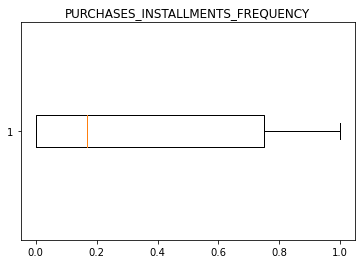

0       0.707313
1       0.916995
2       0.916995
3       0.916995
4       0.916995
          ...   
8945    1.179833
8946    1.179833
8947    0.760469
8948    0.916995
8949    0.916995
Name: PURCHASES_INSTALLMENTS_FREQUENCY, Length: 8950, dtype: float64


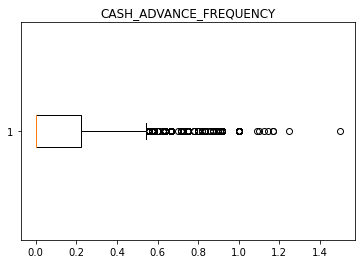

0       0.675349
1       0.573963
2       0.675349
3       0.258913
4       0.675349
          ...   
8945    0.675349
8946    0.675349
8947    0.675349
8948    0.157527
8949    0.990398
Name: CASH_ADVANCE_FREQUENCY, Length: 8950, dtype: float64


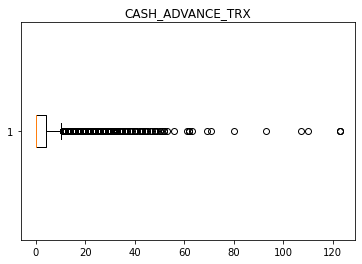

0       0.476070
1       0.110074
2       0.476070
3       0.329534
4       0.476070
          ...   
8945    0.476070
8946    0.476070
8947    0.476070
8948    0.182998
8949    0.182998
Name: CASH_ADVANCE_TRX, Length: 8950, dtype: float64


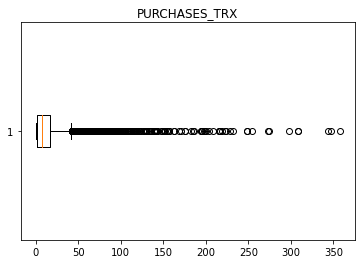

0       0.511333
1       0.591796
2       0.109020
3       0.551565
4       0.551565
          ...   
8945    0.350408
8946    0.350408
8947    0.390639
8948    0.591796
8949    0.333524
Name: PURCHASES_TRX, Length: 8950, dtype: float64


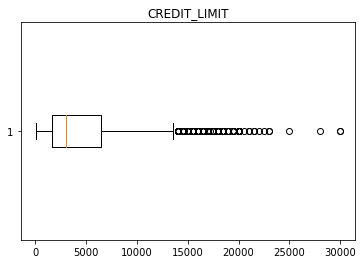

0       0.960433
1       0.688639
2       0.826062
3       0.826062
4       0.905464
          ...   
8945    0.960433
8946    0.960433
8947    0.960433
8948    1.097856
8949    0.905464
Name: CREDIT_LIMIT, Length: 8950, dtype: float64


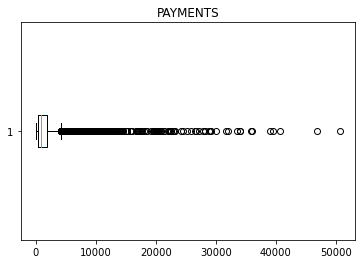

0       0.528979
1       0.818642
2       0.383805
3       0.598688
4       0.364368
          ...   
8945    0.486217
8946    0.503396
8947    0.570615
8948    0.580536
8949    0.576869
Name: PAYMENTS, Length: 8950, dtype: float64


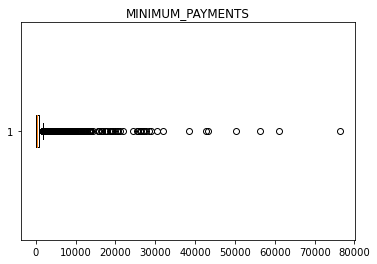

0       3.109675e-01
1       8.931021e-02
2       1.016632e-01
3       4.390474e-16
4       2.657913e-01
            ...     
8945    3.498541e-01
8946    4.390474e-16
8947    3.354655e-01
8948    3.469065e-01
8949    3.329464e-01
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64


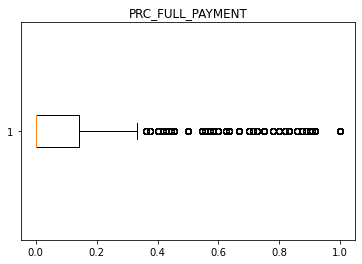

0       0.525551
1       0.234227
2       0.525551
3       0.525551
4       0.525551
          ...   
8945    1.183951
8946    0.525551
8947    0.329200
8948    0.329200
8949    0.525551
Name: PRC_FULL_PAYMENT, Length: 8950, dtype: float64


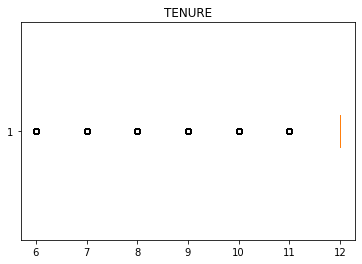

0       0.360680
1       0.360680
2       0.360680
3       0.360680
4       0.360680
          ...   
8945    4.122768
8946    4.122768
8947    4.122768
8948    4.122768
8949    4.122768
Name: TENURE, Length: 8950, dtype: float64


In [10]:
import matplotlib.pyplot as plt
for i in df:
    if df[i].dtype!="object":
        plt.boxplot(df[i],vert=False)
        plt.title(i)
        plt.show()
        z=np.abs(stats.zscore(df[i]))
        print(z)

In [11]:
df.drop(["CUST_ID"],axis=1,inplace=True)

In [12]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<AxesSubplot:>

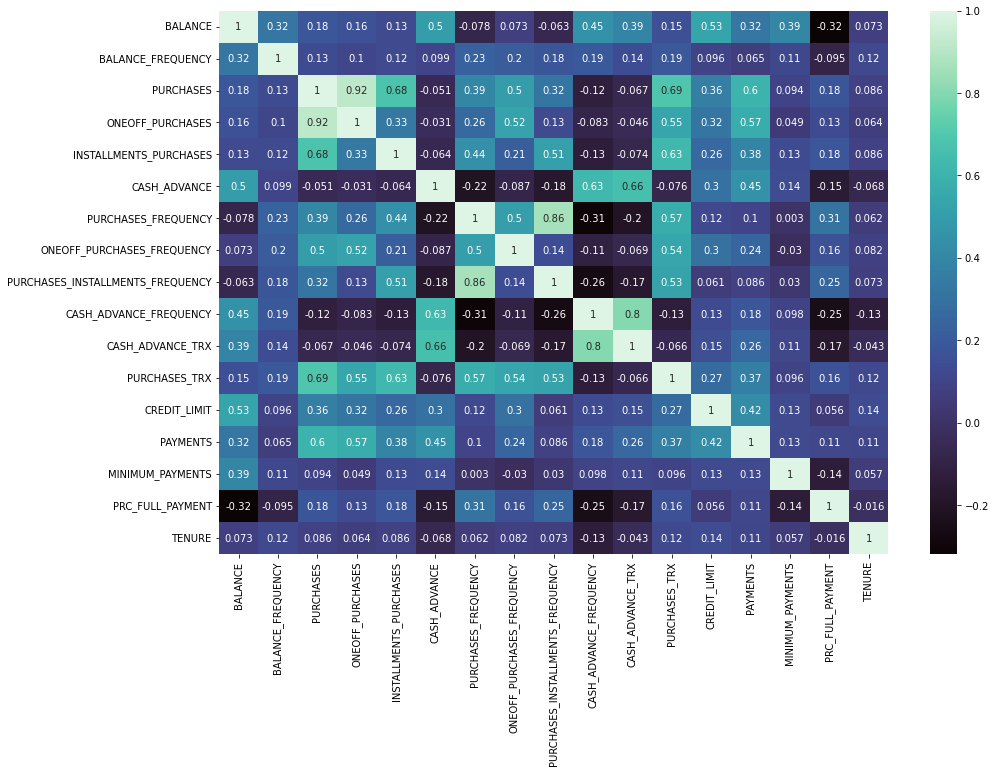

In [19]:
import seaborn as sns 
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap="mako")

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df=ss.fit_transform(df)

# Perform dimensionality reduction using PCA such that the 95% of the variance is explained


In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
print("original dataframe shape: ",df.shape)
df1=pca.fit_transform(df)
print("After PCA df shape",df1.shape)

original dataframe shape:  (8950, 17)
After PCA df shape (8950, 4)


# Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [56]:
distortions=[]
from sklearn.cluster import KMeans
K = range(2,6)
for k in K:
    model = KMeans(n_clusters=k).fit(df1)
    model.fit(df1)
    distortions.append(model.inertia_)

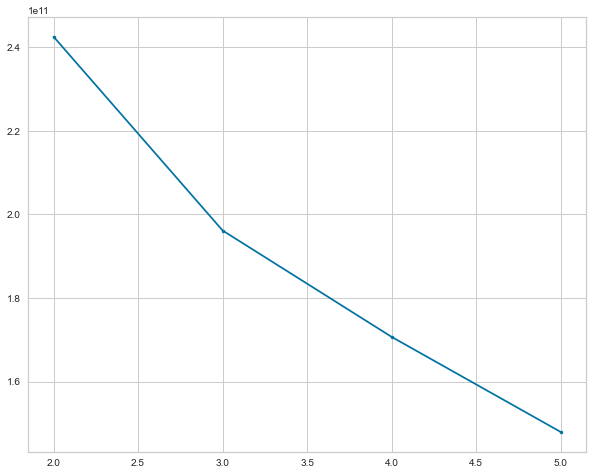

In [57]:
plt.figure(figsize=(10,8))
plt.plot(K,distortions,marker=".")

the above curve indicates that 3 is the best fit for k. (number of clusters=3)

# Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [58]:
from sklearn.metrics import silhouette_score,silhouette_samples

No of clusters 2   Score: 0.5314262395931623


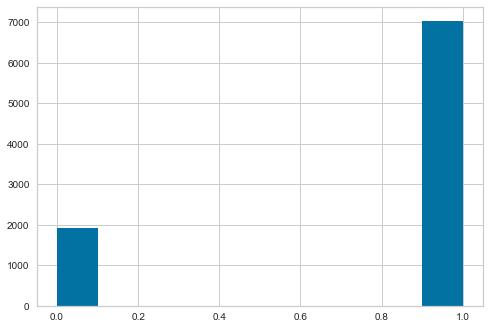

No of clusters 3   Score: 0.4908257847944288


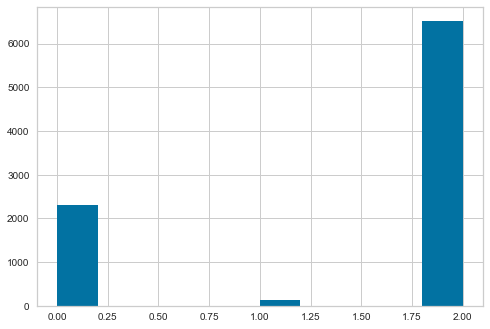

No of clusters 4   Score: 0.424576451373737


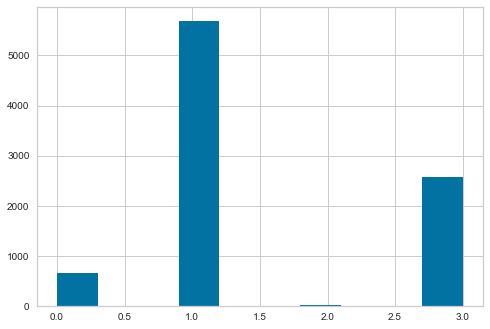

No of clusters 5   Score: 0.40747140448708


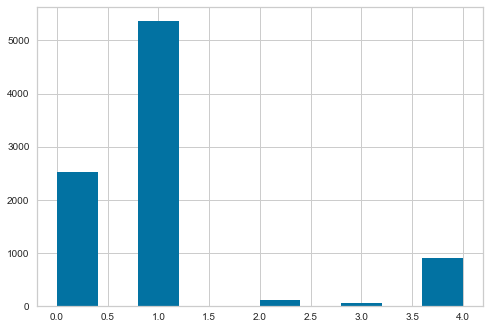

In [62]:
for k in K:
    model = KMeans(n_clusters=k).fit(df1)
    model.fit(df1)
    score=silhouette_score(df1,model.labels_,metric='euclidean')
    print('No of clusters',k,'  Score:',score)
    plt.hist(model.labels_)
    plt.show()

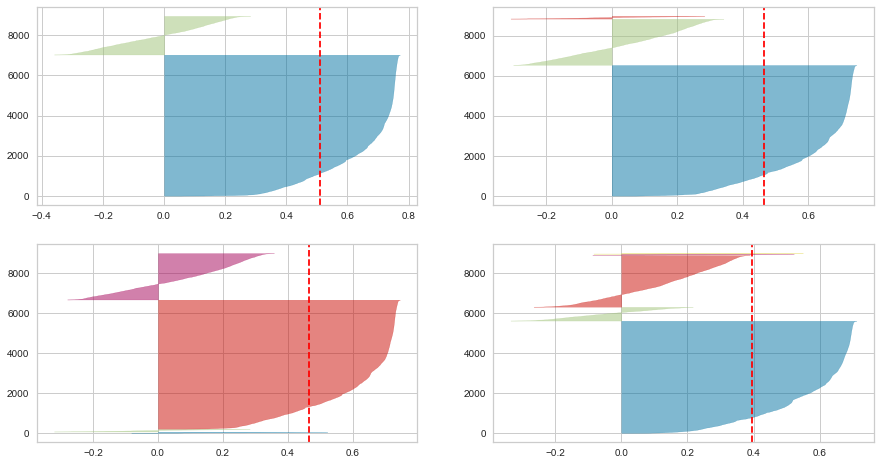

In [65]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in K:
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)